# What was the impact of the Medicaid expansion on the uninsured rate?

**1. As of today, which states have implemented the Medicaid expansion under the Affordable Care Act, and which have not? To answer, produce a table of state implementation dates for the Medicaid expansion, and include in your table states that have not implemented at this point. Produce your own table (don’t just copy paste from elsewhere), and cite whatever sources you used to produce this table.**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_implementation = pd.read_csv('expansion_dates.csv')
df_implementation

,State,Expansion Date
0,ALABAMA,not implemented
1,ALASKA,9/1/2015
2,ARIZONA,1/1/2014
3,ARKANSAS,1/1/2014
4,CALIFORNIA,"Early expansion: 11/1/2010, 1/1/2014*"
5,COLORADO,1/1/2014
6,CONNECTICUT,"Early expansion: 4/1/2010, 1/1/2014*"
7,DELAWARE,1/1/2014
8,DISTRICT OF COLUMBIA,1/1/2014
9,FLORIDA,not implemented


***Sources:***

https://www.kff.org/health-reform/state-indicator/state-activity-around-expanding-medicaid-under-the-affordable-care-act/

https://www.kff.org/health-reform/issue-brief/states-getting-a-jump-start-on-health/

http://www.shadac.org/news/medicaid-“early-opt-in”-states

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4769999/

*expansion_dates.csv* is a file I constructed by hand from the above sources.

Note: An asterisk * denotes a state that expanded Medicaid early, from 2010-2013, under provisions of the Affordable Care Act. Details on early expansion states can be found in 2nd-4th links above. Placing a precise date on the expansion for these early states is difficult because in many cases they phased in different provisions at different times or in only some parts of each state. In the main KFF table of expansion dates, these early states are listed as 1/1/14 for clarity, as this is the date when all provisions of the expansion were fully in place for these early states. 

**2. We are interested in better understanding the evolution of the state-level uninsured rate over time in states that expanded Medicaid versus states that did not. Navigate to
https://www.census.gov/data/tables/time-series/demo/health-insurance/historical-series/hic.html.**

**What table will be best to use to study this question? Download it.**


We want HIC-4, Health Insurance Coverage Status and Type of Coverage by State--All Persons: 2008 to 2018 (hic04_acs.xls). This is based on the ACS, which the Census indicates is better for "single-year estimates of health insurance at the state level." We want the "All Persons" table because we are interested in the total uninsured rate. 

Below, I have read in using pd.read_excel, and set parameters to read it in as a relatively easy-to-use dataframe.

You could have transformed your Excel sheet to a useful dataset in any number of ways, including (though this isn't ideal) pre-processing in Excel before importing into Stata or Python. The way I imported and transformed in the attached code is only one of many options.

In [2]:
df_insurance = pd.read_excel('hic04_acs.xls', index_col=[0,1], header=4, skipfooter=4)
df_insurance

Estimate  \
UNITED STATES                                      Total              322249.0   
                                                   Any coverage       293684.0   
                                                   Uninsured           28566.0   
                                                   Private            217623.0   
                                                   ..Employer-based   177740.0   
                                                   ..Direct-purchase   43191.0   
                                                   ..TRICARE            8767.0   
                                                   Public             114750.0   
                                                   ..Medicaid          65965.0   
                                                   ..Medicare          56869.0   
                                                   ..VA Care            7477.0   
ALABAMA                                            Total                4810.0   
                                                   Any coverage         4329.0   
                                                   Uninsured             481.0   
                                                   Private              3202.0   
                                                   ..Employer-based     2578.0   
                                                   ..Direct-purchase     642.0   
                                                   ..TRICARE             219.0   
                                                   Public               1790.0   
                                                   ..Medicaid            946.0   
                                                   ..Medicare            985.0   
                                                   ..VA Care             138.0   
ALASKA                                             Total                 713.0   
                                                   Any coverage          623.0   
                                                   Uninsured              90.0   
                                                   Private               460.0   
                                                   ..Employer-based      381.0   
                                                   ..Direct-purchase      53.0   
                                                   ..TRICARE              70.0   
                                                   Public                247.0   
...                                                                        ...   
WEST VIRGINIA                                      ..Employer-based      949.0   
                                                   ..Direct-purchase     188.0   
                                                   ..TRICARE              44.0   
                                                   Public                837.0   
                                                   ..Medicaid            469.0   
                                                   ..Medicare            424.0   
                                                   ..VA Care              67.0   
WISCONSIN                                          Total                5741.0   
                                                   Any coverage         5428.0   
                                                   Uninsured             313.0   
                                                   Private              4295.0   
                                                   ..Employer-based     3557.0   
                                                   ..Direct-purchase     836.0   
                                                   ..TRICARE              84.0   
                                                   Public               1897.0   
                                                   ..Medicaid            963.0   
                                                   ..Medicare           1075.0   
                                                   .

Although all you need to do at this point is download and display this table, you can see that you are missing some important column header information - the year, which was contained in an earlier row. 

I'll go ahead and fix this.

First, note it is easy to rename columns in a pandas dataframe. Below I create an example dataframe and show how easy it is to rename the columns using a list.

In [3]:
# Fake example dataframe
df_example = pd.DataFrame({'colA': ['a', 'b'], 'colB': ['c', 'd']})
df_example

,colA,colB
0,a,c
1,b,d


In [4]:
# Column names are stored in a list as a property of the data frame:
df_example.columns

Index(['colA', 'colB'], dtype='object')

In [5]:
# You can simply overwrite df.columns with a desired new list of column names: 
df_example.columns = ['My New Column Name A', 'My New Column Name B']
df_example

,My New Column Name A,My New Column Name B
0,a,c
1,b,d


Returning to my actual data, I'll print out the excel sheet unmodified, to inspect it: 

In [6]:
pd.read_excel('hic04_acs.xls').head()

,"Table with row headers in columns A and B, column headers in rows 4 and 5.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,Table HIC-4_ACS. Health Insurance Coverage Sta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Note: Numbers in thousands. Civilian noninstit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nation/State,Coverage,2018,NaN,NaN,NaN,2017,NaN,NaN,NaN,...,NaN,NaN,2009,NaN,NaN,NaN,2008,NaN,NaN,NaN
3,NaN,NaN,Estimate,Margin of Error,Percent,Margin of Error,Estimate,Margin of Error,Percent,Margin of Error,...,Percent,Margin of Error,Estimate,Margin of Error,Percent,Margin of Error,Estimate,Margin of Error,Percent,Margin of Error
4,UNITED STATES,Total,322249,15,100,Z,320775,15,100,Z,...,100,Z,301472,23,100,Z,298571,20,100,Z


Looks like I have four columns for each year, starting from 2017 and working back to 2008.  I'll print my column names to see what I have and what's missing:

In [7]:
# What are my column names?
df_insurance.columns

Index(['Estimate', 'Margin of Error', 'Percent', 'Margin of Error.1',
       'Estimate.1', 'Margin of Error.2', 'Percent.1', 'Margin of Error.3',
       'Estimate.2', 'Margin of Error.4', 'Percent.2', 'Margin of Error.5',
       'Estimate.3', 'Margin of Error.6', 'Percent.3', 'Margin of Error.7',
       'Estimate.4', 'Margin of Error.8', 'Percent.4', 'Margin of Error.9',
       'Estimate.5', 'Margin of Error.10', 'Percent.5', 'Margin of Error.11',
       'Estimate.6', 'Margin of Error.12', 'Percent.6', 'Margin of Error.13',
       'Estimate.7', 'Margin of Error.14', 'Percent.7', 'Margin of Error.15',
       'Estimate.8', 'Margin of Error.16', 'Percent.8', 'Margin of Error.17',
       'Estimate.9', 'Margin of Error.18', 'Percent.9', 'Margin of Error.19',
       'Estimate.10', 'Margin of Error.20', 'Percent.10',
       'Margin of Error.21'],
      dtype='object')

The easiest - though definitely not the most elegant - way to modify these column names to include the date is just making a new column name list by hand:

In [8]:
new_column_names = [
 '2018-Estimate',
 '2018-Margin of Error',
 '2018-Percent',
 '2018-Margin of Error.1',
 '2017-Estimate.1',
 '2017-Margin of Error.2',
 '2017-Percent.1',
 '2017-Margin of Error.3',
 '2016-Estimate.2',
 '2016-Margin of Error.4',
 '2016-Percent.2',
 '2016-Margin of Error.5',
 '2015-Estimate.3',
 '2015-Margin of Error.6',
 '2015-Percent.3',
 '2015-Margin of Error.7',
 '2014-Estimate.4',
 '2014-Margin of Error.8',
 '2014-Percent.4',
 '2014-Margin of Error.9',
 '2013-Estimate.5',
 '2013-Margin of Error.10',
 '2013-Percent.5',
 '2013-Margin of Error.11',
 '2012-Estimate.6',
 '2012-Margin of Error.12',
 '2012-Percent.6',
 '2012-Margin of Error.13',
 '2011-Estimate.7',
 '2011-Margin of Error.14',
 '2011-Percent.7',
 '2011-Margin of Error.15',
 '2010-Estimate.8',
 '2010-Margin of Error.16',
 '2010-Percent.8',
 '2010-Margin of Error.17',
 '2009-Estimate.9',
 '2009-Margin of Error.18',
 '2009-Percent.9',
 '2009-Margin of Error.19',
 '2008-Estimate.10',
 '2008-Margin of Error.20',
 '2008-Percent.10',
 '2008-Margin of Error.21']

And then assign that column list to the data frame

In [9]:
df_insurance.columns = new_column_names
df_insurance

2018-Estimate  \
UNITED STATES                                      Total                   322249.0   
                                                   Any coverage            293684.0   
                                                   Uninsured                28566.0   
                                                   Private                 217623.0   
                                                   ..Employer-based        177740.0   
                                                   ..Direct-purchase        43191.0   
                                                   ..TRICARE                 8767.0   
                                                   Public                  114750.0   
                                                   ..Medicaid               65965.0   
                                                   ..Medicare               56869.0   
                                                   ..VA Care                 7477.0   
ALABAMA                                            Total                     4810.0   
                                                   Any coverage              4329.0   
                                                   Uninsured                  481.0   
                                                   Private                   3202.0   
                                                   ..Employer-based          2578.0   
                                                   ..Direct-purchase          642.0   
                                                   ..TRICARE                  219.0   
                                                   Public                    1790.0   
                                                   ..Medicaid                 946.0   
                                                   ..Medicare                 985.0   
                                                   ..VA Care                  138.0   
ALASKA                                             Total                      713.0   
                                                   Any coverage               623.0   
                                                   Uninsured                   90.0   
                                                   Private                    460.0   
                                                   ..Employer-based           381.0   
                                                   ..Direct-purchase           53.0   
                                                   ..TRICARE                   70.0   
                                                   Public                     247.0   
...                                                                             ...   
WEST VIRGINIA                                      ..Employer-based           949.0   
                                                   ..Direct-purchase          188.0   
                                                   ..TRICARE                   44.0   
                                                   Public                     837.0   
                                                   ..Medicaid                 469.0   
                                                   ..Medicare                 424.0   
                                                   ..VA Care                   67.0   
WISCONSIN                                          Total                     5741.0   
                                                   Any coverage              5428.0   
                                                   Uninsured                  313.0   
                                                   Private                   4295.0   
                                                   ..Employer-based          3557.0   
                                                   ..Direct-purchase          836.0   
                                                   ..TRICARE                   84.0   
                                                   Public           

**3. Think about some hypotheses for what might happen to overall state-level rates of uninsurance when a state expands the Medicaid program. What would have to be true for the uninsured rate to decrease after a state expands Medicaid? Increase? Have no impact?**

The most obvious hypothesis is that expanding Medicaid will reduce a state's overall uninsured rate. The expansion provides low-income individuals who were not previously eligible for Medicaid access to free health insurance. All other things equal, we expect this would reduce uninsurance rates.

For it to be true that the Medicaid expansion had no impact on the uninsurance rate, it could be the case that people did not take-up the program despite it being newly available to them. For example, in the Oregon Medicaid expansion that we discussed in class (which predated the ACA Medicaid expansion) 2/3 of people who won the lottery did not take up Medicaid. If these effects were even more extreme in other states, and most newly-eligible people do not actually enroll in Medicaid, we might not detect any impact on the overall uninsured rate.

It could also be the case that the Medicaid expansion has no effect on the total uninsured rate because of *crowd-out*. Suppose that newly-eligible low income individuals typically are offered insurance by their employer, but after the Medicaid expansion, those employers dropped their insurance offerings. The net effect on the total uninsured rate would be zero. There could also in theory be crowd-out of insurance purchased directly by these low-income individuals. 

For it to be true that the Medicaid expansion actually *increased* the total uninsured rate, there would have to be complicated and large-magnitude crowd-out dynamics. Suppose that the existence of the Medicaid expansion induced employers of low-income individuals to drop health insurance, but then those individuals did not actually sign up for Medicaid. The expansion could in theory thus result in a net increase in the uninsurance rate.

There is a brief discussion of the literature on crowd-out here, with accompanying links:


https://www.kff.org/medicaid/issue-brief/the-effects-of-medicaid-expansion-under-the-aca-updated-findings-from-a-literature-review-march-2018/

**4. Produce an informative graph of the uninsured rate over time that helps us understand better the relationship between the expansion of Medicaid and state-level uninsurance rates. In order to create a compelling graph, you will need to think about grouping states into a few natural and useful categories. A graph with 50 lines, one for each state, is not easy to read or understand!**

First, we might want to select the relevant rows and columns that represent percent uninsured at the state level. We'll start with a column slice to grab only the 'Percent' columns:

In [10]:
# Note what this first line does - it's called a list comprehension, and 
# it quickly made a list only of the 'Percent' columns. You could have also made
# a list by hand yourself

column_list = [x for x in df_insurance.columns if 'Percent' in x] 
column_list

['2018-Percent',
 '2017-Percent.1',
 '2016-Percent.2',
 '2015-Percent.3',
 '2014-Percent.4',
 '2013-Percent.5',
 '2012-Percent.6',
 '2011-Percent.7',
 '2010-Percent.8',
 '2009-Percent.9',
 '2008-Percent.10']

In [11]:
df_use = df_insurance[column_list]
df_use

2018-Percent  \
UNITED STATES                                      Total                     100.0   
                                                   Any coverage               91.1   
                                                   Uninsured                   8.9   
                                                   Private                    67.5   
                                                   ..Employer-based           55.2   
                                                   ..Direct-purchase          13.4   
                                                   ..TRICARE                   2.7   
                                                   Public                     35.6   
                                                   ..Medicaid                 20.5   
                                                   ..Medicare                 17.6   
                                                   ..VA Care                   2.3   
ALABAMA                                            Total                     100.0   
                                                   Any coverage               90.0   
                                                   Uninsured                  10.0   
                                                   Private                    66.6   
                                                   ..Employer-based           53.6   
                                                   ..Direct-purchase          13.4   
                                                   ..TRICARE                   4.6   
                                                   Public                     37.2   
                                                   ..Medicaid                 19.7   
                                                   ..Medicare                 20.5   
                                                   ..VA Care                   2.9   
ALASKA                                             Total                     100.0   
                                                   Any coverage               87.4   
                                                   Uninsured                  12.6   
                                                   Private                    64.5   
                                                   ..Employer-based           53.5   
                                                   ..Direct-purchase           7.4   
                                                   ..TRICARE                   9.8   
                                                   Public                     34.6   
...                                                                            ...   
WEST VIRGINIA                                      ..Employer-based           53.4   
                                                   ..Direct-purchase          10.6   
                                                   ..TRICARE                   2.5   
                                                   Public                     47.1   
                                                   ..Medicaid                 26.4   
                                                   ..Medicare                 23.9   
                                                   ..VA Care                   3.8   
WISCONSIN                                          Total                     100.0   
                                                   Any coverage               94.5   
                                                   Uninsured                   5.5   
                                                   Private                    74.8   
                                                   ..Employer-based           62.0   
                                                   ..Direct-purchase          14.6   
                                                   ..TRICARE                   1.5   
                                                   Public                     33.0   
                            

Next we want to choose only the rows that have the Uninsured rate. Because this data was read in with a row index containing the Uninsured variable, the syntax is a little complicated. I am actually going to get rid of the index using reset_index() instead. You may not have read in the data with a row index, so you may not want to do this. You can also preserve the row index if you prefer.

In [12]:
df_use = df_use.reset_index()
df_use

,level_0,level_1,2018-Percent,2017-Percent.1,2016-Percent.2,2015-Percent.3,2014-Percent.4,2013-Percent.5,2012-Percent.6,2011-Percent.7,2010-Percent.8,2009-Percent.9,2008-Percent.10
0,UNITED STATES,Total,100.0,100,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,UNITED STATES,Any coverage,91.1,91.3,91.4,90.6,88.3,85.5,85.2,84.9,84.5,84.9,85.4
2,UNITED STATES,Uninsured,8.9,8.7,8.6,9.4,11.7,14.5,14.8,15.1,15.5,15.1,14.6
3,UNITED STATES,Private,67.5,67.6,67.8,67.5,66.4,65.0,65.1,65.2,65.8,67.4,69.6
4,UNITED STATES,..Employer-based,55.2,55,54.7,54.4,54.2,54.0,54.6,54.7,54.9,56.6,58.7
5,UNITED STATES,..Direct-purchase,13.4,13.5,14.1,13.8,12.8,11.9,12.2,12.2,12.7,13.1,14.2
6,UNITED STATES,..TRICARE,2.7,2.7,2.7,2.7,2.6,2.6,2.7,2.6,2.6,2.5,2.6
7,UNITED STATES,Public,35.6,35.5,35.4,34.7,33.2,31.6,31.1,30.5,29.7,28.5,27.3
8,UNITED STATES,..Medicaid,20.5,20.6,20.9,20.5,19.2,17.9,17.9,17.6,17.0,16.2,15.1
9,UNITED STATES,..Medicare,17.6,17.3,17.0,16.7,16.3,15.9,15.5,15.0,14.7,14.4,14.3


In [13]:
# Delaware is missing for 2017, replace N with null value
df_use.loc[df_use['2017-Percent.1'] == 'N', '2017-Percent.1'] = np.nan
df_use['2017-Percent.1'] = df_use['2017-Percent.1'].astype(float)

In [14]:
df_uninsured = df_use[df_use['level_1']=='Uninsured']
df_uninsured

,level_0,level_1,2018-Percent,2017-Percent.1,2016-Percent.2,2015-Percent.3,2014-Percent.4,2013-Percent.5,2012-Percent.6,2011-Percent.7,2010-Percent.8,2009-Percent.9,2008-Percent.10
2,UNITED STATES,Uninsured,8.9,8.7,8.6,9.4,11.7,14.5,14.8,15.1,15.5,15.1,14.6
13,ALABAMA,Uninsured,10.0,9.4,9.1,10.1,12.1,13.6,13.3,14.3,14.6,13.8,13.3
24,ALASKA,Uninsured,12.6,13.7,14.0,14.9,17.2,18.5,20.5,20.1,19.9,21.1,19.1
35,ARIZONA,Uninsured,10.6,10.1,10.0,10.8,13.6,17.1,17.6,17.2,16.9,17.3,18.0
46,ARKANSAS,Uninsured,8.2,7.9,7.9,9.5,11.8,16.0,16.4,17.1,17.5,17.0,17.1
57,CALIFORNIA,Uninsured,7.2,7.2,7.3,8.6,12.4,17.2,17.9,18.1,18.5,18.0,17.3
68,COLORADO,Uninsured,7.5,7.5,7.5,8.1,10.3,14.1,14.7,15.1,15.9,15.8,16.7
79,CONNECTICUT,Uninsured,5.3,5.5,4.9,6.0,6.9,9.4,9.1,8.8,9.1,8.8,8.8
90,DELAWARE,Uninsured,5.7,NaN,5.7,5.9,7.8,9.1,8.8,9.4,9.7,10.2,10.0
101,DISTRICT OF COLUMBIA,Uninsured,3.2,3.8,3.9,3.8,5.3,6.7,5.9,6.9,7.6,7.0,7.6


Finally, I'll merge in implementation dates:

In [15]:
df_analysis_uninsured = pd.merge(df_uninsured, df_implementation, left_on='level_0', right_on='State', how='inner')
df_analysis_uninsured

,level_0,level_1,2018-Percent,2017-Percent.1,2016-Percent.2,2015-Percent.3,2014-Percent.4,2013-Percent.5,2012-Percent.6,2011-Percent.7,2010-Percent.8,2009-Percent.9,2008-Percent.10,State,Expansion Date
0,ALABAMA,Uninsured,10.0,9.4,9.1,10.1,12.1,13.6,13.3,14.3,14.6,13.8,13.3,ALABAMA,not implemented
1,ALASKA,Uninsured,12.6,13.7,14.0,14.9,17.2,18.5,20.5,20.1,19.9,21.1,19.1,ALASKA,9/1/2015
2,ARIZONA,Uninsured,10.6,10.1,10.0,10.8,13.6,17.1,17.6,17.2,16.9,17.3,18.0,ARIZONA,1/1/2014
3,ARKANSAS,Uninsured,8.2,7.9,7.9,9.5,11.8,16.0,16.4,17.1,17.5,17.0,17.1,ARKANSAS,1/1/2014
4,CALIFORNIA,Uninsured,7.2,7.2,7.3,8.6,12.4,17.2,17.9,18.1,18.5,18.0,17.3,CALIFORNIA,"Early expansion: 11/1/2010, 1/1/2014*"
5,COLORADO,Uninsured,7.5,7.5,7.5,8.1,10.3,14.1,14.7,15.1,15.9,15.8,16.7,COLORADO,1/1/2014
6,CONNECTICUT,Uninsured,5.3,5.5,4.9,6.0,6.9,9.4,9.1,8.8,9.1,8.8,8.8,CONNECTICUT,"Early expansion: 4/1/2010, 1/1/2014*"
7,DELAWARE,Uninsured,5.7,NaN,5.7,5.9,7.8,9.1,8.8,9.4,9.7,10.2,10.0,DELAWARE,1/1/2014
8,DISTRICT OF COLUMBIA,Uninsured,3.2,3.8,3.9,3.8,5.3,6.7,5.9,6.9,7.6,7.0,7.6,DISTRICT OF COLUMBIA,1/1/2014
9,FLORIDA,Uninsured,13.0,12.9,12.5,13.3,16.6,20.0,20.1,20.9,21.3,20.9,20.2,FLORIDA,not implemented


Now, in preparation to make a graph, we need to do some thought. How should we group states? Because we are interested in the impact of the Medicaid expansion on the uninsured rate over time, it's natural to want to group states by their expansion date. 

I'll first explore frequencies according to implementation date:

In [16]:
# The following command tabulates our data, showing the number of observations with each implementation date
df_analysis_uninsured.groupby('Expansion Date').size()

Expansion Date
1/1/2014                                  20
1/1/2015                                   1
1/1/2016                                   1
1/1/2019                                   1
1/10/2019                                  1
2/1/2015                                   1
4/1/2014                                   1
7/1/2016                                   1
8/15/2014                                  1
9/1/2015                                   1
Early expansion: 03/1/2010, 1/1/2014*      1
Early expansion: 04/14/2011, 1/1/2014*     1
Early expansion: 1/3/2011, 1/1/2014*       1
Early expansion: 11/1/2010,  1/1/2014*     1
Early expansion: 4/1/2010, 1/1/2014*       1
approved; TBD                              3
not implemented                           14
dtype: int64

First, we need to decide how to group states. Because we are interested in the impact of the Medicaid expansion on the uninsured rate over time, it's natural to want to group states by their expansion date. 

We first explore frequencies according to implementation date, which you can see above.

I decided to make rough groups by year of implementation. The largest group is 2014 implementers. I make a category for early implementers, group late-implementers adopting between 2015-2017 together (because these states all implemented in the period for which we have uninsured rate data from the Census), and include 2019 and TBD implementers with the non-implementers, because our data ends in 2018. The only difficult case here is Maine, which KFF says implemented on 1/10/2019, but coverage was eventually made retroactive to 7/2/2018. It's not totally clear whether Maine should thus be counted for 2018, but I made the judgment call to assign to 2019 because it is unlikely that people were making active coverage decisions in 2018 because they anticipated they would eventually receive Medicaid. You might have also reasonably decided to put it into the "late implementers" group.

You might have made different choices, but you should have come up with no more than 3-5 logical state groups.

A straightforward way to implement these groupings would be to simply make another column in your original Expansion Date table, containing the new category groupings.

To be a bit cleaner, I will actually make another dataframe containing groupings, and merge them together.

In [17]:
categories = pd.read_csv('categories.csv', header=None, names=['Expansion Date', 'category'])
categories

,Expansion Date,category
0,1/1/2014,2014
1,1/1/2015,late
2,1/1/2016,late
3,1/1/2019,never
4,1/10/2019,never
5,2/1/2015,late
6,4/1/2014,2014
7,7/1/2016,late
8,8/15/2014,2014
9,9/1/2015,late


In [18]:
df_analysis_uninsured = pd.merge(df_analysis_uninsured, categories, on = 'Expansion Date')

Now, I want to get the simple mean of each category in each year:

In [19]:
grouped = df_analysis_uninsured.groupby('category').mean()
grouped

,2018-Percent,2017-Percent.1,2016-Percent.2,2015-Percent.3,2014-Percent.4,2013-Percent.5,2012-Percent.6,2011-Percent.7,2010-Percent.8,2009-Percent.9,2008-Percent.10
category,,,,,,,,,,,
2014,6.272727,6.261905,6.050000,6.777273,8.763636,11.786364,11.886364,12.227273,12.781818,12.472727,12.277273
early,6.140000,6.180000,6.060000,6.880000,9.060000,12.400000,12.320000,12.600000,12.820000,12.380000,11.800000
late,8.520000,8.860000,9.220000,10.880000,13.320000,15.060000,15.900000,16.100000,16.000000,16.180000,15.200000
never,10.610526,10.500000,10.178947,10.889474,12.631579,14.668421,14.936842,15.305263,15.610526,15.357895,14.647368


In [20]:
grouped.columns = [2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008]
grouped

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
category,,,,,,,,,,,
2014,6.272727,6.261905,6.050000,6.777273,8.763636,11.786364,11.886364,12.227273,12.781818,12.472727,12.277273
early,6.140000,6.180000,6.060000,6.880000,9.060000,12.400000,12.320000,12.600000,12.820000,12.380000,11.800000
late,8.520000,8.860000,9.220000,10.880000,13.320000,15.060000,15.900000,16.100000,16.000000,16.180000,15.200000
never,10.610526,10.500000,10.178947,10.889474,12.631579,14.668421,14.936842,15.305263,15.610526,15.357895,14.647368


In [21]:
import matplotlib.pyplot as plt

The above table, *grouped*, will be easier to work with using matplotlib if we have year as a row (and not as column headers as above). There are many ways to do this, but stacking and unstacking is extremely handy for you to know about:

In [22]:
grouped = grouped.stack()
grouped

category      
2014      2018     6.272727
          2017     6.261905
          2016     6.050000
          2015     6.777273
          2014     8.763636
          2013    11.786364
          2012    11.886364
          2011    12.227273
          2010    12.781818
          2009    12.472727
          2008    12.277273
early     2018     6.140000
          2017     6.180000
          2016     6.060000
          2015     6.880000
          2014     9.060000
          2013    12.400000
          2012    12.320000
          2011    12.600000
          2010    12.820000
          2009    12.380000
          2008    11.800000
late      2018     8.520000
          2017     8.860000
          2016     9.220000
          2015    10.880000
          2014    13.320000
          2013    15.060000
          2012    15.900000
          2011    16.100000
          2010    16.000000
          2009    16.180000
          2008    15.200000
never     2018    10.610526
          2017    10.500000
     

We could subset this into four different datasets and plot four graphs on top of each other, but an even easier way is to then unstack the data so that the categories are on top:

In [23]:
grouped = grouped.unstack(0)
grouped

category,2014,early,late,never
2018,6.272727,6.14,8.52,10.610526
2017,6.261905,6.18,8.86,10.500000
2016,6.050000,6.06,9.22,10.178947
2015,6.777273,6.88,10.88,10.889474
2014,8.763636,9.06,13.32,12.631579
2013,11.786364,12.40,15.06,14.668421
2012,11.886364,12.32,15.90,14.936842
2011,12.227273,12.60,16.10,15.305263
2010,12.781818,12.82,16.00,15.610526
2009,12.472727,12.38,16.18,15.357895


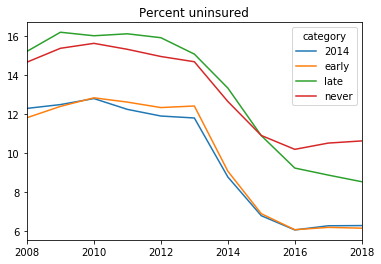

In [24]:
grouped.plot(title="Percent uninsured")

**5. Next, produce two additional graphs with a similar structure, that illustrate the effect of expanding Medicaid. The first should graph should consider the percentage of state population enrolled in Medicaid, and the second should consider the percentage of state population with private insurance.**


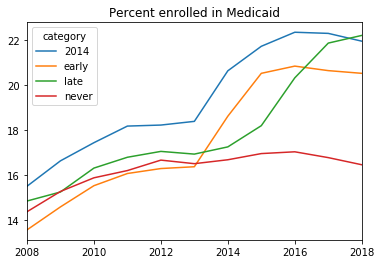

In [25]:
df_medicaid = df_use[df_use['level_1']=='..Medicaid']
df_analysis = pd.merge(df_medicaid, df_implementation, left_on='level_0', right_on='State', how='inner')
df_analysis = pd.merge(df_analysis, categories, on = 'Expansion Date')
grouped = df_analysis.groupby('category').mean()
grouped.columns = [2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008]
grouped = grouped.stack()
grouped = grouped.unstack(0)
grouped.plot(title="Percent enrolled in Medicaid")

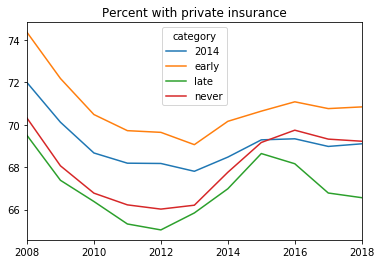

In [26]:
df_medicaid = df_use[df_use['level_1']=='Private']
df_analysis = pd.merge(df_medicaid, df_implementation, left_on='level_0', right_on='State', how='inner')
df_analysis = pd.merge(df_analysis, categories, on = 'Expansion Date')
grouped = df_analysis.groupby('category').mean()
grouped.columns = [2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008]
grouped = grouped.stack()
grouped = grouped.unstack(0)
grouped.plot(title="Percent with private insurance")

**6. Consider the graphs you made. What can you say about the causal effect of the Medicaid expansion on the uninsured rate? Be specific about how what you have found relates to this question, and be precise about what you can and cannot say with certainty.**


It seems likely there is a causal impact of the Medicaid expansion on the overall uninsured rate. The never-adopting states show a clearly different pattern than the other groups, with a less-extreme declining trend in uninsured rates after the ACA came into effect in 2014. The never-adopting states end up in 2018 with the highest uninsured rate overall by a considerable amount, even though prior to 2016 they looked similar to late-adopting states.

The "Percent Enrolled in Medicaid" graph shows us that the Medicaid expansion is in fact increasing the number of people with insurance through Medicaid. There isn't something weird going on where Medicaid expansion states are decreasing their overall number of uninsured people by some other means. The increases in Medicaid coverage occur at the exact times we'd expect - in 2014 for states that expanded on-time, and 2015-2016 for late expanders. Never expanders don't see noticeable increases in Medicaid coverage, and the rate even appears to be declining in recent years.

Finally, we can consider the private-insurance crowd-out concerns discussed above. Although it is hard to know the counterfactual - would private insurance have increased in the absence of the Medicaid expansion? - we can say that private insurance does not seem to decline in the on-time-adopting and early adopting states. On the other hand, we *do* see declines in private insurance in the late adopting states, which is interesting and indicates that there are possibly some systematic differences in those late-adopting states, which overall look more like the never-adopters than they do the early and on-time adopters, with higher initial rates of uninsured, etc. Perhaps there is some crowd-out in the types of states that adopted late, and this might be relevant to states that have not yet adopted.



**7. (Extra Credit) Conduct a difference-in-differences analysis on the impact of Medicaid expansion on the uninsured rate. Explain any modeling choices you have made in order to conduct this analysis. What assumptions need to hold for you analysis to be valid? Do you believe they hold?**


A very helpful simple explainer of DD can be found __[here](https://www.mailman.columbia.edu/research/population-health-methods/difference-difference-estimation)__. A simple/canonical DD framework, is also described __[here](https://thetarzan.wordpress.com/2011/06/20/differences-in-differences-estimation-in-r-and-stata/)__.

We will first conduct a simple comparison of Medicaid-expansion-adopting and non-adopting states. We will think of the never implementers as the "control" and the implementers as the "treatment." This canonical Difference-in-Difference analysis contrasts the mean outcome (uninsured rate) in states that adopted the policy against states that did not, assuming the states that did not adopt would have otherwise (absent the intervention) followed *parallel trends* with the the states that did, and thus can be used as controls. If this *parallel trends assumption* holds, we can find the *causal effect* of the policy by conducting a double-difference calculation (hence the name).

As is stated in the first DiD explainer above, "although there is no statistical test for this \[the parallel trends\] assumption, visual inspection is useful when you have observations over many time points.'' This is where the plots you made are very helpful. As you can see in the plots above, although the expansion and non-expansion states have different *levels* of their uninsurance rate in the period before 2014, they seem to follow very similar *trends* over time in the period before 2014, across all three metrics we looked at. As long as nothing about their relative trends would have otherwise changed in 2014 absent the ACA/Medicaid expansion, the parallel trends assumption should hold. 

To narrow down to two groups (treatment and control) to compare, I first exclude late adopters from the analysis entirely, rather than choosing to group them with on-time adopters or the never adopters. Looking at the above analysis, these states just look pretty different. They have a higher level of pre-ACA uninsurance rates, looking like the never-adopters before expanding. They show a delayed effect of Medicaid (which would be expected, of course, but complicates a pre-post simple analysis) and have this strange private insurance decline that is unique compared to the other state groups. 

I will further group early adopters with 2014 adopters. We know that while they adopted some elements of the expansion early, they also are counted by some sources as expanding in 2014 because all provisions finally came into force then. They also look very similar to the 2014 adopters when plotted on the above graphs.

We first compare means of each of the two groups, before and after 2014:


In [27]:
df_analysis_uninsured.columns = ['State Name', 'Insurance Status', 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 'State', 'Expansion Date', 'category']
df_analysis = df_analysis_uninsured[df_analysis_uninsured['category'] != 'late']
df_analysis = df_analysis[['State', 'category', 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]].set_index(['State', 'category']).stack().reset_index()
df_analysis.columns = ['State', 'Category', 'Year', 'UninsuredRate']
df_analysis['AdoptedMedicaid'] = (df_analysis['Category'] != 'never') * 1

In [28]:
pre = df_analysis[df_analysis['Year']<2014].groupby('AdoptedMedicaid').mean()['UninsuredRate']
pre

AdoptedMedicaid
0    15.087719
1    12.266049
Name: UninsuredRate, dtype: float64

In [29]:
post = df_analysis[df_analysis['Year']>=2014].groupby('AdoptedMedicaid').mean()['UninsuredRate']
post

AdoptedMedicaid
0    10.962105
1     6.836567
Name: UninsuredRate, dtype: float64

In [30]:
diff1 = post-pre
diff1

AdoptedMedicaid
0   -4.125614
1   -5.429482
Name: UninsuredRate, dtype: float64

In [31]:
diff1[1]-diff1[0]

-1.303868183449219

In other words, the Medicaid expansion states had an uninsured rate that was 1.3 percentage points lower than they otherwise would have had they not adopted the expansion, *if* we assume that nonexpansion states are good controls for expansion states (i.e. if the parallel trends assumption holds). 

A more advanced approach is to use a regression framework to get the same exact estimates that we just found, and this will also give us standard errors to assess statistical significance:

$Y= β0 + β1*AfterImplementation + β2*HadIntervention + β3*AfterImplementation*HadIntervention +ε$

In [32]:
df_analysis['AfterMedicaid'] = (df_analysis['Year'] >= 2014) * 1
df_analysis['Interaction'] = df_analysis['AdoptedMedicaid'] * df_analysis['AfterMedicaid']
df_analysis

,State,Category,Year,UninsuredRate,AdoptedMedicaid,AfterMedicaid,Interaction
0,ALABAMA,never,2008,13.3,0,0,0
1,ALABAMA,never,2009,13.8,0,0,0
2,ALABAMA,never,2010,14.6,0,0,0
3,ALABAMA,never,2011,14.3,0,0,0
4,ALABAMA,never,2012,13.3,0,0,0
5,ALABAMA,never,2013,13.6,0,0,0
6,ALABAMA,never,2014,12.1,0,1,0
7,ALABAMA,never,2015,10.1,0,1,0
8,ALABAMA,never,2016,9.1,0,1,0
9,ALABAMA,never,2017,9.4,0,1,0


In [33]:
model = ols("UninsuredRate ~ AdoptedMedicaid + AfterMedicaid + Interaction", df_analysis).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:          UninsuredRate   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     130.0
Date:                Sat, 12 Oct 2019   Prob (F-statistic):           2.66e-62
Time:                        04:25:02   Log-Likelihood:                -1330.0
No. Observations:                 505   AIC:                             2668.
Df Residuals:                     501   BIC:                             2685.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          15.0877      0.317     

As you should be able to see, the coefficients of this regression map perfectly onto the means we calculated in our two-way DiD table. The regression does give us the additional information that all four coefficients are statistically significant, i.e., we can reject the null hypothesis that Medicaid expansion states were not different from non-Medicaid expansion states in their uninsured rate, after the Medicaid expansion was implemented in 2014. Because of this, if our identifying assumption of *otherwise parallel trends* in the adopting and non-adopting states holds,  we can state with some confidence that the Medicaid expansion had a *causal* impact on the uninsured rate in states that implemented the program.